## Import Statements ##

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

## iOS Appstore Sentiment Reviews ##

In [2]:
df = pd.read_csv("iOSAppStoreDivvyReviews.csv")

In [3]:
df.iloc[:,6].head

<bound method NDFrame.head of 0      Great concept, bad execution.I love the idea b...
1      Use any other mode of transportation.Absolutel...
2      App Broken | Availability of Bikes not Synced....
3      Divvy is my key to the city..Last year I signe...
4      Ultra condescending customer service.I downloa...
                             ...                        
151    Favorited don’t work.I tried to filter on favo...
152    Trash app.Charged me twice while not sending t...
153    GPS location.Ever since the last update of the...
154    Divvy app works great for me, why so many nega...
155    Broken! Broken!!!.Yes, I said it twice.\n\nI r...
Name: review, Length: 156, dtype: object>

In [4]:
only_reviews = df.iloc[:, 6].values

In [5]:
iOS_reviews = pd.DataFrame({'reviews': only_reviews})
iOS_reviews.head(5)

,reviews
0,"Great concept, bad execution.I love the idea b..."
1,Use any other mode of transportation.Absolutel...
2,App Broken | Availability of Bikes not Synced....
3,Divvy is my key to the city..Last year I signe...
4,Ultra condescending customer service.I downloa...


In [6]:
# Initialize the SentimentIntensityAnalyzer.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vedantigulalkari/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
vader = SentimentIntensityAnalyzer()
function = lambda title: vader.polarity_scores(title)['compound']
iOS_reviews['compound'] = iOS_reviews['reviews'].apply(function)
iOS_reviews.head(5)

,reviews,compound
0,"Great concept, bad execution.I love the idea b...",-0.4478
1,Use any other mode of transportation.Absolutel...,0.3813
2,App Broken | Availability of Bikes not Synced....,0.5700
3,Divvy is my key to the city..Last year I signe...,0.9444
4,Ultra condescending customer service.I downloa...,-0.0475


In [8]:
def getAnalysis(score):
 if score < 0:
    return 'Negative'
 elif score == 0:
    return 'Neutral'
 else:
    return 'Positive'

iOS_reviews['sentiment'] = iOS_reviews['compound'].apply(getAnalysis)

iOS_reviews.head(5)

,reviews,compound,sentiment
0,"Great concept, bad execution.I love the idea b...",-0.4478,Negative
1,Use any other mode of transportation.Absolutel...,0.3813,Positive
2,App Broken | Availability of Bikes not Synced....,0.5700,Positive
3,Divvy is my key to the city..Last year I signe...,0.9444,Positive
4,Ultra condescending customer service.I downloa...,-0.0475,Negative


In [9]:
iOS_reviews['sentiment'].value_counts()

Positive    76
Negative    63
Neutral     17
Name: sentiment, dtype: int64

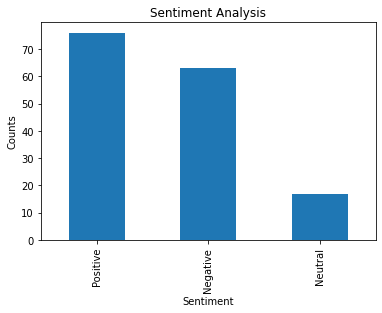

In [10]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
iOS_reviews['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

Text(0, 0.5, 'iOS Reviews Sentiment')

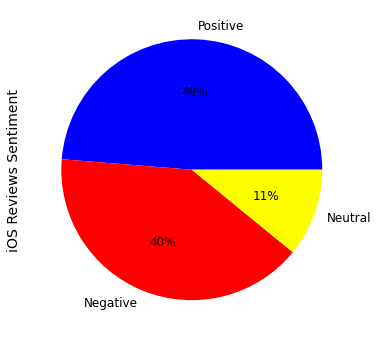

In [11]:
iOS_reviews.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=12, figsize=(9,6), colors=["blue", "red", "yellow"])
plt.ylabel("iOS Reviews Sentiment", size=14)

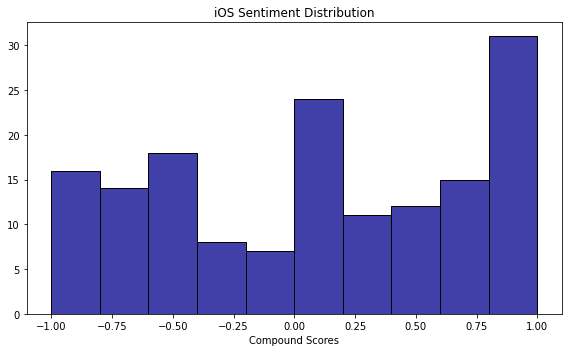

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(iOS_reviews, x='compound', color="darkblue", bins=10, binrange=(-1, 1))
plt.title("iOS Sentiment Distribution")
plt.xlabel("Compound Scores")
plt.ylabel("")
plt.tight_layout()

## Google PlayStore Sentiment Analysis ##

In [13]:
df_GPS = pd.read_csv("GooglePlayStoreDivvyReviews.csv")

In [14]:
df_GPS.iloc[:,4].head

<bound method NDFrame.head of 0                                            Lots of fun
1      Its good, they need to make the bike angel stu...
2                                      Grate bus tracker
3                                          Sha oong aooh
4      Fun once you find a working scooter. Had to go...
                             ...                        
262    I like the ride time feature and the idea of t...
263    Can't create account without buying a pass. If...
264    It needs to let you save favorite stations. I ...
265    Would like to be able to save frequently used ...
266    User should be able to look at the available d...
Name: content, Length: 267, dtype: object>

In [15]:
only_reviews = df_GPS.iloc[:, 4].values

In [16]:
GPS_reviews = pd.DataFrame({'reviews': only_reviews})
GPS_reviews.head(5)

,reviews
0,Lots of fun
1,"Its good, they need to make the bike angel stu..."
2,Grate bus tracker
3,Sha oong aooh
4,Fun once you find a working scooter. Had to go...


In [17]:
# Initialize the SentimentIntensityAnalyzer.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vedantigulalkari/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
vader = SentimentIntensityAnalyzer()
function = lambda title: vader.polarity_scores(title)['compound']
GPS_reviews['compound'] = GPS_reviews['reviews'].apply(function)
GPS_reviews.head(5)

,reviews,compound
0,Lots of fun,0.5106
1,"Its good, they need to make the bike angel stu...",0.7906
2,Grate bus tracker,0.0000
3,Sha oong aooh,0.0000
4,Fun once you find a working scooter. Had to go...,0.7003


In [19]:
def getAnalysis(score):
 if score <= 0:
    return 'Negative'
 elif score == 0:
    return 'Neutral'
 else:
    return 'Positive'

GPS_reviews['sentiment'] = GPS_reviews['compound'].apply(getAnalysis)

GPS_reviews.head(5)

,reviews,compound,sentiment
0,Lots of fun,0.5106,Positive
1,"Its good, they need to make the bike angel stu...",0.7906,Positive
2,Grate bus tracker,0.0000,Negative
3,Sha oong aooh,0.0000,Negative
4,Fun once you find a working scooter. Had to go...,0.7003,Positive


In [20]:
GPS_reviews['sentiment'].value_counts()

Negative    157
Positive    110
Name: sentiment, dtype: int64

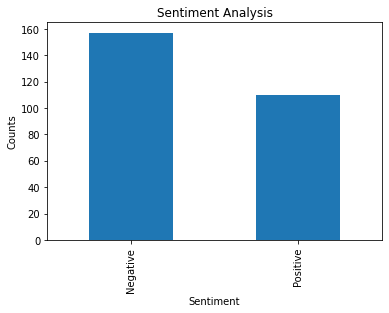

In [21]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
GPS_reviews['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

Text(0, 0.5, 'Google Play Store Reviews Sentiment')

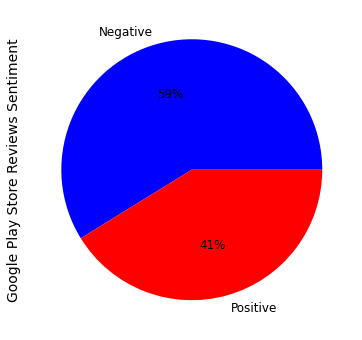

In [22]:
GPS_reviews.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=12, figsize=(9,6), colors=["blue", "red", "yellow"])
plt.ylabel("Google Play Store Reviews Sentiment", size=14)

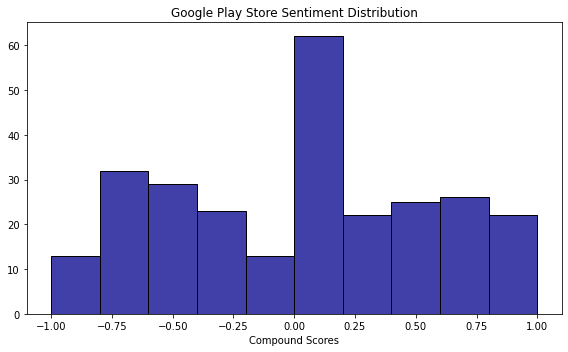

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(GPS_reviews, x='compound', color="darkblue", bins=10, binrange=(-1, 1))
plt.title("Google Play Store Sentiment Distribution")
plt.xlabel("Compound Scores")
plt.ylabel("")
plt.tight_layout()

## Trip Advisor Sentiment Analysis ##

In [24]:
df_TA = pd.read_csv("Divvy_Tripadvisor.csv",encoding='windows-1254')

In [25]:
df_TA.iloc[:,7].head

<bound method NDFrame.head of 0     horrible experience with divvy bikes.when I re...
1     Fraudulent charges.Fraudulent charges after bi...
2     Are care when using their bikes.A rip off. I u...
3     Fraud.we rented some bikes after returning the...
4     Misleading and charge what they want.Myself an...
5     They try to rip off people hoping they will no...
6     Looking for Lawyer for lawsuit against Divvy.L...
7     $1200 charge for malfunctions equipment.Got ch...
8     Bad.They don’t have bikes in the stations but ...
9     My Aching Back.The idea of bike sharing is gre...
10    Used to be great, now AWFUL :(.It used to be a...
11    Setting up account is hard.My husband and I wa...
12    Is Divvy/Lyft a scam?.Divvy/Lyft has stolen fr...
13    $103 for less than ten minutes!.I got charged ...
14    Money Mistake.I was on the bikes last night wi...
15    It’s up with Divvy they took 57 $ then 275 and...
16    I works fine until it doesn't.When something g...
17    PLEASE DONT 

In [26]:
only_reviews = df_TA.iloc[:,7].values

In [27]:
TA_reviews = pd.DataFrame({'reviews': only_reviews})
TA_reviews.head(5)

,reviews
0,horrible experience with divvy bikes.when I re...
1,Fraudulent charges.Fraudulent charges after bi...
2,Are care when using their bikes.A rip off. I u...
3,Fraud.we rented some bikes after returning the...
4,Misleading and charge what they want.Myself an...


In [28]:
# Initialize the SentimentIntensityAnalyzer.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vedantigulalkari/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
vader = SentimentIntensityAnalyzer()
function = lambda title: vader.polarity_scores(title)['compound']
TA_reviews['compound'] = TA_reviews['reviews'].apply(function)
TA_reviews.head(5)

,reviews,compound
0,horrible experience with divvy bikes.when I re...,-0.1719
1,Fraudulent charges.Fraudulent charges after bi...,-0.9142
2,Are care when using their bikes.A rip off. I u...,0.7339
3,Fraud.we rented some bikes after returning the...,-0.8360
4,Misleading and charge what they want.Myself an...,-0.9721


In [30]:
def getAnalysis(score):
 if score < 0:
    return 'Negative'
 elif score == 0:
    return 'Neutral'
 else:
    return 'Positive'

TA_reviews['sentiment'] = TA_reviews['compound'].apply(getAnalysis)

TA_reviews.head(5)

,reviews,compound,sentiment
0,horrible experience with divvy bikes.when I re...,-0.1719,Negative
1,Fraudulent charges.Fraudulent charges after bi...,-0.9142,Negative
2,Are care when using their bikes.A rip off. I u...,0.7339,Positive
3,Fraud.we rented some bikes after returning the...,-0.8360,Negative
4,Misleading and charge what they want.Myself an...,-0.9721,Negative


In [31]:
TA_reviews['sentiment'].value_counts()

Negative    21
Positive     9
Name: sentiment, dtype: int64

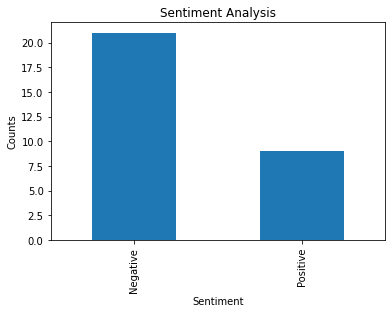

In [32]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
TA_reviews['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

Text(0, 0.5, 'Trip Advisor Reviews Sentiment')

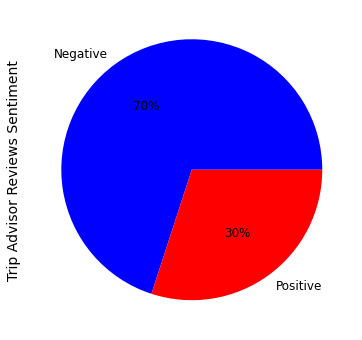

In [33]:
TA_reviews.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=12, figsize=(9,6), colors=["blue", "red", "yellow"])
plt.ylabel("Trip Advisor Reviews Sentiment", size=14)

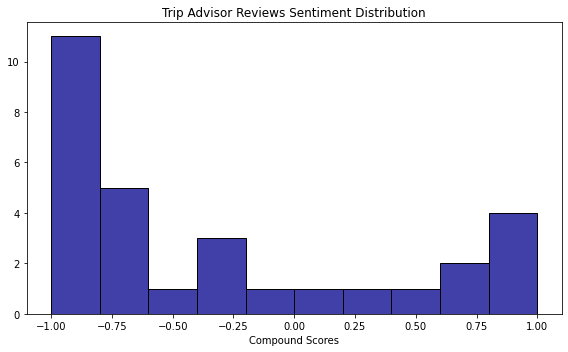

In [34]:
plt.figure(figsize=(8, 5))
sns.histplot(TA_reviews, x='compound', color="darkblue", bins=10, binrange=(-1, 1))
plt.title("Trip Advisor Reviews Sentiment Distribution")
plt.xlabel("Compound Scores")
plt.ylabel("")
plt.tight_layout()

## EBike Reviews Sentiment Analysis ##

In [35]:
df_ebike = pd.read_csv("EBikes Reviews.csv")

In [36]:
only_reviews = df_ebike.iloc[:,0].values

In [37]:
df_ebike.iloc[:,0].head

<bound method NDFrame.head of 0     VISITORS BEWARE! E-bikes cost much more than j...
1     when I returned the bike, it locked as it shou...
2     we rented some bikes after returning them corr...
3     Got charged $1200 because their malfunctioning...
4     They don抰 have bikes in the stations but they ...
                            ...                        
83    The app doesn't allow you to rent multiple bik...
84    Seems all stations I go to never have bikes. W...
85    I purchased a full day $15 pass off my credit ...
86    Divvy is a bike sharing service to get you fro...
87    Yes, I said it twice.\n\nI registered on the a...
Name: Review, Length: 88, dtype: object>

In [38]:
ebike_reviews = pd.DataFrame({'reviews': only_reviews})
ebike_reviews.head(5)

,reviews
0,VISITORS BEWARE! E-bikes cost much more than j...
1,"when I returned the bike, it locked as it shou..."
2,we rented some bikes after returning them corr...
3,Got charged $1200 because their malfunctioning...
4,They don抰 have bikes in the stations but they ...


In [39]:
# Initialize the SentimentIntensityAnalyzer.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vedantigulalkari/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
vader = SentimentIntensityAnalyzer()
function = lambda title: vader.polarity_scores(title)['compound']
ebike_reviews['compound'] = ebike_reviews['reviews'].apply(function)
ebike_reviews.head(5)

,reviews,compound
0,VISITORS BEWARE! E-bikes cost much more than j...,0.8002
1,"when I returned the bike, it locked as it shou...",0.4102
2,we rented some bikes after returning them corr...,-0.8360
3,Got charged $1200 because their malfunctioning...,-0.6343
4,They don抰 have bikes in the stations but they ...,-0.6486


In [41]:
def getAnalysis(score):
 if score < 0:
    return 'Negative'
 elif score == 0:
    return 'Neutral'
 else:
    return 'Positive'

ebike_reviews['sentiment'] = ebike_reviews['compound'].apply(getAnalysis)

ebike_reviews.head(5)

,reviews,compound,sentiment
0,VISITORS BEWARE! E-bikes cost much more than j...,0.8002,Positive
1,"when I returned the bike, it locked as it shou...",0.4102,Positive
2,we rented some bikes after returning them corr...,-0.8360,Negative
3,Got charged $1200 because their malfunctioning...,-0.6343,Negative
4,They don抰 have bikes in the stations but they ...,-0.6486,Negative


In [42]:
ebike_reviews['sentiment'].value_counts()

Negative    45
Positive    39
Neutral      4
Name: sentiment, dtype: int64

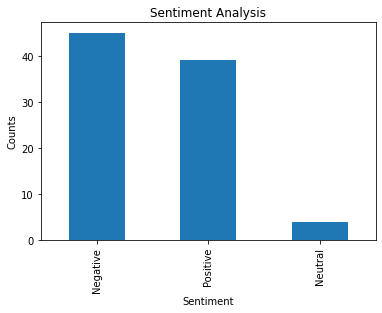

In [43]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
ebike_reviews['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

Text(0, 0.5, 'EBikes Reviews Sentiment')

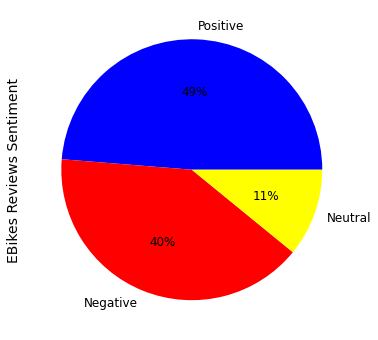

In [44]:
iOS_reviews.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=12, figsize=(9,6), colors=["blue", "red", "yellow"])
plt.ylabel("EBikes Reviews Sentiment", size=14)

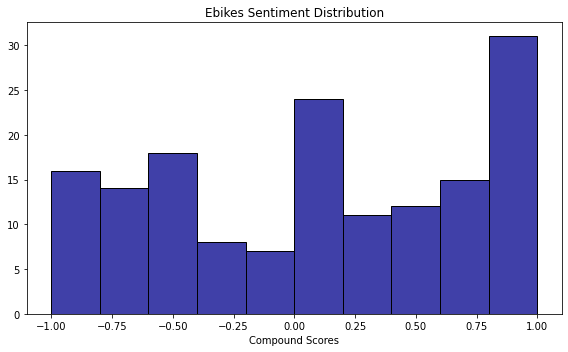

In [45]:
plt.figure(figsize=(8, 5))
sns.histplot(iOS_reviews, x='compound', color="darkblue", bins=10, binrange=(-1, 1))
plt.title("Ebikes Sentiment Distribution")
plt.xlabel("Compound Scores")
plt.ylabel("")
plt.tight_layout()